<a href="https://colab.research.google.com/github/turkyman75/Household-Power-Consumption/blob/main/capstone_cars_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/deep_project/dataset

/content/drive/MyDrive/deep_project/dataset


In [ ]:
%ls

DATA/  number_of_samples.csv


In [ ]:
from zipfile import ZipFile
import os
  
def get_all_file_paths(directory):
  
    # initializing empty file paths list
    file_paths = []
  
    # crawling through directory and subdirectories
    for root, directories, files in os.walk(directory):
        for filename in files:
            # join the two strings in order to form the full filepath.
            filepath = os.path.join(root, filename)
            file_paths.append(filepath)
  
    # returning all file paths
    return file_paths        
  
def main():
    # path to folder which needs to be zipped
    directory = '/content/drive/MyDrive/deep_project/dataset/data.zip'
  
    # calling function to get all file paths in the directory
    file_paths = get_all_file_paths(directory)
  
    # printing the list of all files to be zipped
    #print('Following files will be zipped:')
    for file_name in file_paths:
        print(file_name)
  
    # writing files to a zipfile
    with ZipFile('data.zip','w') as zip:
        # writing each file one by one
        for file in file_paths:
            zip.write(file)
  
    print('All files zipped successfully!')        
  
  
if __name__ == "__main__":
    main()

All files zipped successfully!


In [ ]:
import shutil
shutil.make_archive('/content/drive/MyDrive/deep_project/dataset/data', 'zip', '/content/drive/MyDrive/deep_project/dataset')

'/content/drive/MyDrive/deep_project/dataset/data.zip'

In [ ]:
%cd DATA

/content/drive/MyDrive/deep_project/dataset/DATA


In [ ]:
# import the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import seaborn as sns
import pickle
import os
import glob as gb
import random
import cv2
from PIL import Image
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from keras.models import Sequential, Model
from keras.utils.data_utils import get_file
from keras.layers.convolutional import Conv2D, AveragePooling2D
from keras.layers import MaxPooling2D, Flatten, Dense, Dropout,Input, Add, Activation, ZeroPadding2D
from keras.layers import BatchNormalization, AveragePooling2D, GlobalAveragePooling2D, GlobalMaxPooling2D  

In [ ]:
# Reading CSV File
df = pd.read_csv('/content/drive/MyDrive/deep_project/dataset/number_of_samples.csv')



In [ ]:
df.head()

,Unnamed: 0,Name of class,Number of files
0,0,bmw serie 1,82
1,1,chevrolet spark,108
2,2,chevroulet aveo,129
3,3,clio,344
4,4,duster,280


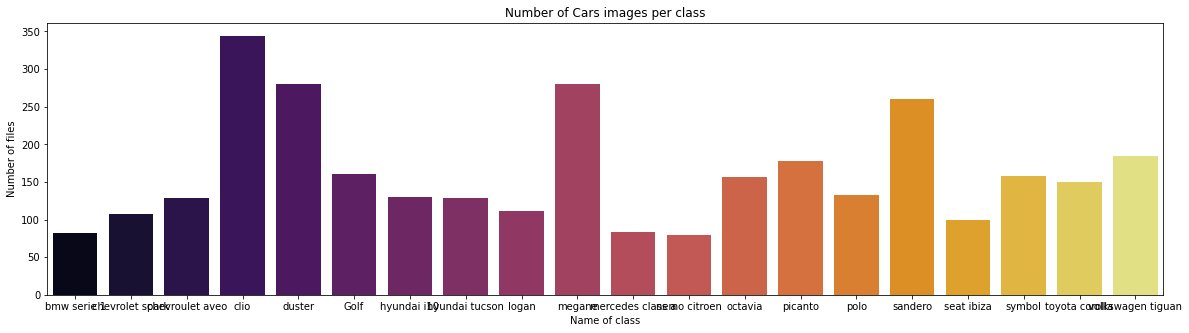

In [ ]:
# Number of Cars images per class
plt.figure(figsize=(20,5))
sns.barplot(y = df["Number of files"], x = df["Name of class"],palette = "inferno")
plt.title("Number of Cars images per class")
plt.show()


In [ ]:
# Reading image dataset
dataset = '/content/drive/MyDrive/deep_project/dataset/DATA/DATA/'

In [ ]:
# Name of each directory
data = os.listdir(dataset)
data

['Golf',
 'bmw serie 1',
 'chevrolet spark',
 'chevroulet aveo',
 'clio',
 'duster',
 'hyundai i10',
 'hyundai tucson',
 'logan',
 'megane',
 'mercedes class a',
 'nemo citroen',
 'octavia',
 'picanto',
 'polo',
 'sandero',
 'seat ibiza',
 'symbol',
 'toyota corolla',
 'volkswagen tiguan']

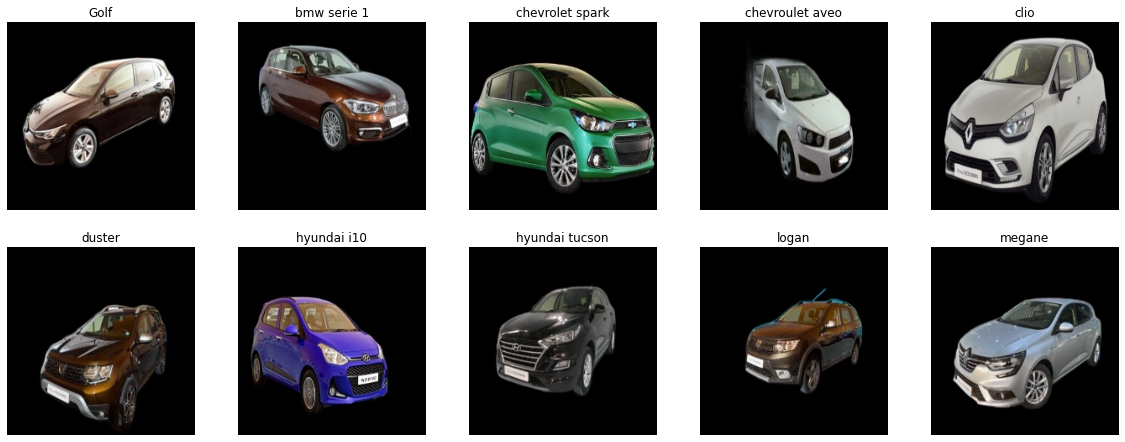

In [ ]:
# Generate random sample with title of class to visualise
plt.figure(figsize=(20, 20))
for i in range(10):
    px = plt.subplot(5, 5, i + 1)
    rand = random.randrange(1, 30)                                  
    current_dir = os.listdir(dataset+'/'+str(data[i]))             
    img = cv2.imread(dataset+'/'+str(data[i])+'/'+current_dir[rand])  
    plt.imshow(img )                                               
    plt.title(data[i])                                             
    plt.axis("off")

plt.show()

Input image shape is  (224, 224, 3)


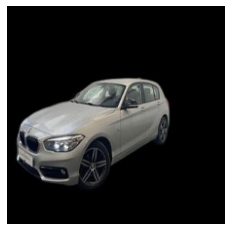

In [ ]:
# image size
img_path = r'/content/drive/MyDrive/deep_project/dataset/DATA/DATA/bmw serie 1/back1.jpg'
#img_path = r'/content/drive/MyDrive/deep_project/dataset/bmw serie 1/back1.jpg'
img = plt.imread(img_path)
print ('Input image shape is ',img.shape)
plt.axis('off')
imshow(img)

### *Data Pipeline*

In [ ]:
# Create an empty list to store the labels
labels = []

# Define the path to the image directory
image_dir = '/content/drive/MyDrive/deep_project/dataset'

# Get a list of all subdirectories in the image directory
folders = [f for f in os.listdir(image_dir) if os.path.isdir(os.path.join(image_dir, f))]

# Iterate through the subdirectories
for folder in folders:
    # Get the name of the folder
    label = folder
    # Append the label to the labels list
    labels.append(label)

In [ ]:
# Create lists to store the filenames and labels
filenames = []
labels = []

# Define the path to the image directory
image_dir = '/content/drive/MyDrive/deep_project/dataset/DATA/DATA'

# Get a list of all subdirectories in the image directory
folders = [f for f in os.listdir(image_dir) if os.path.isdir(os.path.join(image_dir, f))]

# Iterate through the subdirectories
for folder in folders:
    # Get the name of the folder (label)
    label = folder
    # Get a list of all files in the subdirectory
    folder_path = os.path.join(image_dir, folder)
    files = os.listdir(folder_path)
    # Iterate through the files
    for file in files:
        # Get the full path of the file
        file_path = os.path.join(folder_path, file)
        # Append the file path and label to the lists
        filenames.append(file_path)
        labels.append(label)

In [ ]:
# Create a dataframe with the filenames and labels
df = pd.DataFrame({'filename': filenames, 'label': labels})

# Shuffle the dataframe
df = df.sample(frac=1).reset_index(drop=True)

In [ ]:
# Create empty lists to store the images and labels
X = []
y = []

# Load the images
for i, row in df.iterrows():
    # Open the image
    img = Image.open(row['filename'])
    # Resize the image
    img = img.resize((224, 224))
    # Convert the image to an array
    img_array = np.array(img)
    # Append the image to the images list
    X.append(img_array)
    # Append the label to the labels list
    y.append(row['label'])

In [ ]:
# save the images and labels to a pickle file
file_x = open('/content/drive/MyDrive/deep_project/dataset/DATA/X.pickle', 'wb')
pickle.dump(X, file_x)
file_x.close()

file_y = open('/content/drive/MyDrive/deep_project/dataset/DATA/y.pickle', 'wb')
pickle.dump(y, file_y)
file_y.close()

In [ ]:
X = pickle.load(open('/content/drive/MyDrive/deep_project/dataset/DATA/X.pickle', 'rb'))
y = pickle.load(open('/content/drive/MyDrive/deep_project/dataset/DATA/y.pickle', 'rb'))

In [ ]:
# labe encoding the labels
encoder = LabelEncoder()
y = encoder.fit_transform(y)

# One-hot encode the labels
y = to_categorical(y, num_classes=20)

In [ ]:
# Reshape the X array
X = np.reshape(X, (len(X), 224, 224, 3))

### *training and testing data*

In [ ]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# numbers of each part
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2588, 224, 224, 3)
(2588, 20)
(647, 224, 224, 3)
(647, 20)


### *Data augmentation*

In [ ]:
#kn
model = Sequential()

model.add(Conv2D(32, (3, 3),input_shape=(224, 224, 3),strides = (1,1),  padding = 'same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Conv2D(64, (3, 3),strides = (1,1),  padding = 'same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3),strides = (1,1),  padding = 'same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, (3, 3),strides = (1,1),  padding = 'same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(units=20, activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 224, 224, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 112, 112, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0

In [ ]:
#Kn
history = model.fit(X_train,y_train,epochs=50,batch_size=64,verbose=1,workers=-1,use_multiprocessing=True, validation_data=(X_test, y_test))

Epoch 1/50
41/41 [==============================] - 9s 216ms/step - loss: 0.2175 - accuracy: 0.9285 - val_loss: 1.5700 - val_accuracy: 0.6909
Epoch 2/50
41/41 [==============================] - 9s 212ms/step - loss: 0.1717 - accuracy: 0.9463 - val_loss: 1.7902 - val_accuracy: 0.6924
Epoch 3/50
41/41 [==============================] - 9s 221ms/step - loss: 0.1802 - accuracy: 0.9447 - val_loss: 1.6227 - val_accuracy: 0.7094
Epoch 4/50
41/41 [==============================] - 9s 221ms/step - loss: 0.1734 - accuracy: 0.9455 - val_loss: 1.5909 - val_accuracy: 0.6955
Epoch 5/50
41/41 [==============================] - 9s 214ms/step - loss: 0.1617 - accuracy: 0.9447 - val_loss: 1.7554 - val_accuracy: 0.6893
Epoch 6/50
41/41 [==============================] - 9s 222ms/step - loss: 0.1877 - accuracy: 0.9428 - val_loss: 1.7485 - val_accuracy: 0.7017
Epoch 7/50
41/41 [==============================] - 9s 220ms/step - loss: 0.1801 - accuracy: 0.9405 - val_loss: 1.8801 - val_accuracy: 0.6893
Epoch 

In [ ]:
# Evaluate the model on your test data
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Accuracy: %.2f%%" % (scores[1]*100))

CNN Accuracy: 72.49%


In [ ]:
# save model and architecture to single file
from tensorflow.keras.models import save_model
save_model(model, "/content/drive/MyDrive/deep_project/models/cnn_model.h5")

In [ ]:
def get_metrics(history):
    fig = plt.figure(figsize = (10,10))
    plt.subplot(2,2,1)
    plt.plot(history.history["accuracy"], label = "training accuracy")
    plt.plot(history.history["val_accuracy"], label = "test accuracy")
    plt.legend()
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")

    plt.subplot(2,2,2)
    plt.plot(history.history["loss"], label = "train loss")
    plt.plot(history.history["val_loss"], label = "test loss")
    plt.legend()
    plt.xlabel("Epoch")
    plt.ylabel("Loss")

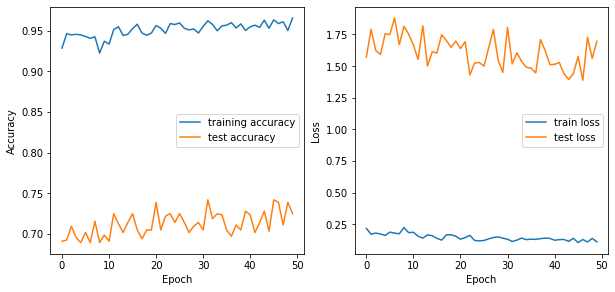

In [ ]:
get_metrics(history)

In [ ]:
from sklearn.metrics import classification_report
# Load your predicted and actual labels
y_pred = model.predict(X_test)
y_true = y_test

# Convert predicted probabilities to binary classes
y_pred_binary = np.round(y_pred).astype(int)


# Print classification report
cnn_cr = classification_report(y_true, y_pred_binary)
print("CNN Classification Report:")
print(cnn_cr)

21/21 [==============================] - 0s 17ms/step
CNN Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.69      0.75        45
           1       1.00      0.68      0.81        19
           2       0.68      0.79      0.73        19
           3       0.75      0.55      0.63        22
           4       0.71      0.79      0.75        76
           5       0.76      0.86      0.81        49
           6       0.93      0.50      0.65        26
           7       0.84      0.73      0.78        22
           8       0.95      1.00      0.98        20
           9       0.73      0.80      0.76        54
          10       1.00      0.44      0.61        25
          11       0.85      0.52      0.65        21
          12       0.88      0.72      0.79        32
          13       0.75      0.83      0.79        36
          14       0.67      0.50      0.57        24
          15       0.75      0.72      0.73        46


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Create Model for Car classification Using Transfer learning Based on Tensorflow Hub efficientnet 


## Data augmentation 


In [ ]:
%cd /content/drive/MyDrive/deep_project/dataset/DATA/DATA

/content/drive/MyDrive/deep_project/dataset/DATA/DATA


In [ ]:
%rm -r .ipynb_checkpoints/ 


rm: cannot remove '.ipynb_checkpoints/': No such file or directory


In [ ]:
len(os.listdir('/content/drive/MyDrive/deep_project/dataset/DATA/DATA'))  

20

In [ ]:
train_datagen = ImageDataGenerator(
    rescale = 1.0/255.0,
    rotation_range=30,# rotation
        width_shift_range=0.2, # horizontal shift
        height_shift_range=0.2, # vertical shift
        zoom_range=0.2, # zoom
        horizontal_flip=True, #  horizontal flip 
        brightness_range=[0.2,1.2],
    validation_split= .25)
train_it = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/deep_project/dataset/DATA/DATA', 
    target_size=(224, 224), 
    class_mode='categorical', 
    batch_size=32, 
    shuffle=True,
    subset='training')
val_it = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/deep_project/dataset/DATA/DATA', 
    target_size=(224, 224), 
    class_mode='categorical', 
    batch_size=32, 
    shuffle=True,
    subset='validation')

Found 2429 images belonging to 20 classes.
Found 806 images belonging to 20 classes.


In [ ]:

class_names = list(df["Name of class"])
print(len(class_names))

20


## Create the model  

In [ ]:
from tensorflow.python.keras.engine.base_layer import InputSpec
from tensorflow.python import keras
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers

m = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1",
                   trainable=False,
                   input_shape=(224,224,3)),  
    tf.keras.layers.Dense(20, activation='softmax')
])
   

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [ ]:
from tensorflow.python import summary
m.summary() 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              4049564   
                                                                 
 dense_2 (Dense)             (None, 20)                25620     
                                                                 
Total params: 4,075,184
Trainable params: 25,620
Non-trainable params: 4,049,564
_________________________________________________________________


In [ ]:
m.compile(
    loss="categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
) 

## Train the model

In [ ]:
history_eff=m.fit(train_it,
                epochs=60,
                steps_per_epoch=len(train_it),
                validation_data=val_it,
                validation_steps=len(val_it))  

Epoch 1/60
76/76 [==============================] - 64s 714ms/step - loss: 2.6297 - accuracy: 0.2190 - val_loss: 2.3865 - val_accuracy: 0.3313
Epoch 2/60
76/76 [==============================] - 60s 795ms/step - loss: 2.0642 - accuracy: 0.4347 - val_loss: 2.0559 - val_accuracy: 0.4082
Epoch 3/60
76/76 [==============================] - 61s 810ms/step - loss: 1.7803 - accuracy: 0.5356 - val_loss: 1.8626 - val_accuracy: 0.5000
Epoch 4/60
76/76 [==============================] - 50s 664ms/step - loss: 1.5621 - accuracy: 0.5994 - val_loss: 1.7098 - val_accuracy: 0.5248
Epoch 5/60
76/76 [==============================] - 52s 690ms/step - loss: 1.4019 - accuracy: 0.6608 - val_loss: 1.6125 - val_accuracy: 0.5509
Epoch 6/60
76/76 [==============================] - 50s 657ms/step - loss: 1.3114 - accuracy: 0.6723 - val_loss: 1.5396 - val_accuracy: 0.5658
Epoch 7/60
76/76 [==============================] - 49s 645ms/step - loss: 1.2171 - accuracy: 0.6966 - val_loss: 1.4748 - val_accuracy: 0.5695

## Plot the evaluation steps

In [ ]:
import matplotlib.pyplot as plt
def plot_loss_curves(history):
  loss= history.history["loss"]
  val_loss= history.history["val_loss"]
  accuracy= history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]
  epochs=range(len(loss))
  plt.plot(epochs,loss , label="training_loss")
  plt.plot(epochs,val_loss,label="val_loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()
  plt.figure()
  plt.plot(epochs,accuracy,label="training_accuracy")
  plt.plot(epochs,val_accuracy,label="val_accuracy")
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.legend() 


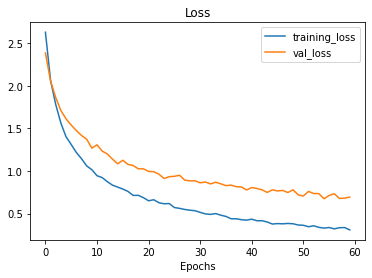

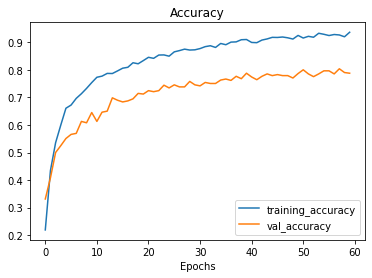

In [ ]:
plot_loss_curves(history_eff) 

## Test The prediction of the Model



In [ ]:
def load_and_prep_image(filename, img_shape=224):
  img= tf.io.read_file(filename)
  img= tf.image.decode_image(img)
  img= tf.image.resize(img,size=[img_shape,img_shape])
  img= img/255.
  return img  

In [ ]:
def pred_and_plot(model,filename, class_names=class_names):
  #import the target image and preprocess it
  img= load_and_prep_image(filename)
 
  #Make a predictions

  pred = model.predict(tf.expand_dims(img, axis=0))

  #get the predicted  class
  pred_class= class_names[np.argmax(pred[0])]

  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 76ms/step


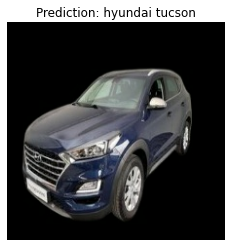

In [ ]:
pred_and_plot(model=m,
              filename="/content/drive/MyDrive/deep_project/dataset/DATA/DATA/hyundai tucson/back617.jpg",
              class_names=class_names) 

## Save the model 

In [ ]:
# save model and architecture to single file
from tensorflow.keras.models import save_model
save_model(m, "/content/drive/MyDrive/deep_project/models/model_efficientnet.h5")

In [ ]:
!jupyter nbconvert capstone_cars_classification.ipynb --to slides --post serve